In [1]:
import sympy
import numpy as np
import matplotlib.pyplot as plt

# Métodos numéricos

<img src="figures/LogoCinvestav.png" style="height:100px" title="Cinvestav">

**CINVESTAV Unidad Saltillo**

**Curso Propedeutico del Programa de Maestría en Ciencias en Ingeniería Metalúrgica**

Dr. Edgar Ivan Castro Cedeño




Contacto:
[edgar.castro@cinvestav.mx](mailto:edgar.castro@cinvestav.mx)

# Apéndice: Representación esquemática de métodos de Euler y de Runge-Kutta-4

In [2]:
# equation
def F(x,y):
    return -0.5*x**4 + 4*x**3 - 10*x**2 + 8.5*x + 1


def f(x,y):
    return -2*x**3 + 12*x**2 - 20*x + 8.5


## Esquema del método de Euler

In [3]:
def euler(f, x0, y0, h):
    return y0 + f(x0,y0)*h

### tamaño de paso grueso

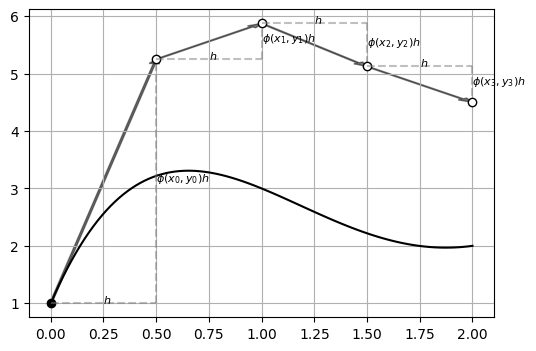

In [4]:
fig, ax = plt.subplots(figsize=(6, 4))

#
x = np.linspace(0, 2, 100)
y = np.zeros_like(x)


dx = 0.5

ax.plot(x, F(x,y), color='black')
x0,  y0 = 0, 1

X = []
ax.plot(x0, y0, ls='', marker='o', color='black')
for i, x0 in enumerate(np.arange(0, 2, dx)):
    
    #plot euler method as arrows
    dy = f(x0,y0)*dx
    ax.arrow(x0, y0, dx, dy,
             color='black',
             alpha=0.5,
             length_includes_head=True, 
             width=0.01, head_width=0.05
    )
    ax.plot([x0,x0+dx], [y0, y0], ls='--', color='gray', alpha=0.5)
    ax.plot([x0+dx, x0+dx], [y0, y0+dy], ls='--', color='gray', alpha=0.5)

    ax.annotate(r"$h$", xy=((x0+dx/2), y0), fontsize=8)
    ax.annotate(f"$\phi(x_{i},y_{i})h$", xy=(x0+dx, y0+dy/2), fontsize=8)

    # plot euler as points
    ax.plot(x0+dx, euler(f, x0, y0, dx), ls='', marker='o', color='black', mfc='white')   
    y0 = euler(f, x0, y0, dx)

ax.grid()
plt.show()

### tamaño de paso fino

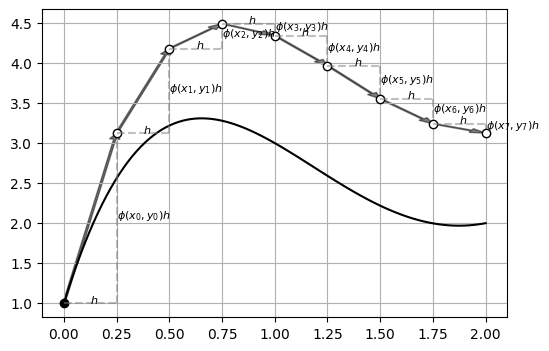

In [5]:
fig, ax = plt.subplots(figsize=(6, 4))

#
x = np.linspace(0, 2, 100)
y = np.zeros_like(x)


dx = 0.25

ax.plot(x, F(x,y), color='black')
x0,  y0 = 0, 1

X = []
ax.plot(x0, y0, ls='', marker='o', color='black')
for i, x0 in enumerate(np.arange(0, 2, dx)):
    
    #plot euler method as arrows
    dy = f(x0,y0)*dx
    ax.arrow(x0, y0, dx, dy,
             color='black',
             alpha=0.5,
             length_includes_head=True, 
             width=0.01, head_width=0.05
    )
    ax.plot([x0,x0+dx], [y0, y0], ls='--', color='gray', alpha=0.5)
    ax.plot([x0+dx, x0+dx], [y0, y0+dy], ls='--', color='gray', alpha=0.5)

    ax.annotate(r"$h$", xy=((x0+dx/2), y0), fontsize=8)
    ax.annotate(f"$\phi(x_{i},y_{i})h$", xy=(x0+dx, y0+dy/2), fontsize=8)

    # plot euler as points
    ax.plot(x0+dx, euler(f, x0, y0, dx), ls='', marker='o', color='black', mfc='white')   
    y0 = euler(f, x0, y0, dx)

ax.grid()
plt.show()

## Esquema del método Runge-Kutta 4

In [6]:
def rk4(f, x0, y0, h):
    k1 = f(x0, y0)
    k2 = f(x0+0.5*h, y0+0.5*k1*h)
    k3 = f(x0+0.5*h, y0+0.5*k2*h)
    k4 = f(x0+h, y0+k3*h)
    return y0 + 1/6 * (k1 + 2*k2 + 2*k3 + k4)*h
    

### tamaño de paso grueso

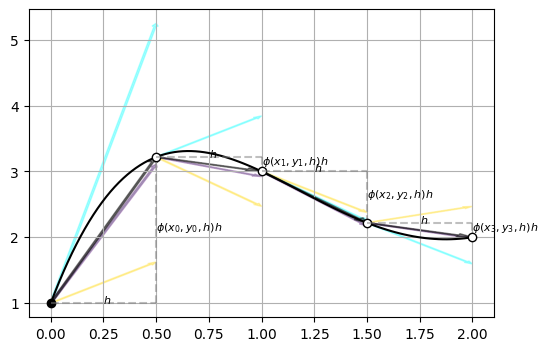

In [7]:
fig, ax = plt.subplots(figsize=(6, 4))

#
x = np.linspace(0, 2, 100)
y = np.zeros_like(x)


dx = 0.5

ax.plot(x, F(x,y), color='black')
x0,  y0 = 0, 1

X = []
ax.plot(x0, y0, ls='', marker='o', color='black')
for i, x0 in enumerate(np.arange(0, 2, dx)):
    
    #plot rk4 method as arrows
    k1 = f(x0, y0)
    k2 = f(x0+0.5*dx, y0+0.5*k1*dx)
    k3 = f(x0+0.5*dx, y0+0.5*k2*dx)
    k4 = f(x0+dx, y0+k3*dx)
    rk = 1/6 * (k1 + 2*k2 + 2*k3 + k4)

    ax.arrow(x0, y0, dx, k1*dx,color='cyan', alpha=0.3, length_includes_head=True, width=0.01, head_width=0.03)
    ax.arrow(x0, y0, dx, k2*dx, color='magenta', alpha=0.3, length_includes_head=True, width=0.01, head_width=0.03)
    ax.arrow(x0, y0, dx, k3*dx, color='seagreen', alpha=0.3, length_includes_head=True, width=0.01, head_width=0.03)
    ax.arrow(x0, y0, dx, k4*dx, color='gold', alpha=0.3, length_includes_head=True, width=0.01, head_width=0.03)
    ax.arrow(x0, y0, dx, rk*dx, color='black', alpha=0.5, length_includes_head=True,  width=0.01, head_width=0.05)
    
    ax.plot([x0,x0+dx], [y0, y0], ls='--', color='gray', alpha=0.5)
    ax.plot([x0+dx, x0+dx], [y0, y0+(rk*dx)], ls='--', color='gray', alpha=0.5)

    ax.annotate(r"$h$", xy=((x0+dx/2), y0),
                fontsize=8
        )
    ax.annotate(f"$\phi(x_{i},y_{i},h)h$", xy=(x0+dx, y0+(rk*dx)/2),
                fontsize=8
        )

    # plot rk4 as points
    ax.plot(x0+dx, rk4(f, x0, y0, dx), ls='', marker='o', color='black', mfc='white')   
    y0 = rk4(f, x0, y0, dx)

ax.grid()
plt.show()

### tamaño de paso fino

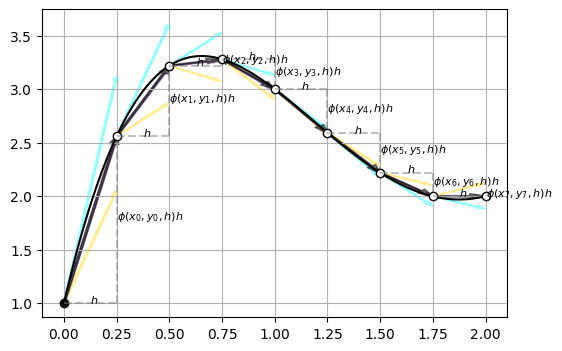

In [8]:
fig, ax = plt.subplots(figsize=(6, 4))

#
x = np.linspace(0, 2, 100)
y = np.zeros_like(x)


dx = 0.25

ax.plot(x, F(x,y), color='black')
x0,  y0 = 0, 1

X = []
ax.plot(x0, y0, ls='', marker='o', color='black')
for i, x0 in enumerate(np.arange(0, 2, dx)):
    
    #plot rk4 method as arrows
    k1 = f(x0, y0)
    k2 = f(x0+0.5*dx, y0+0.5*k1*dx)
    k3 = f(x0+0.5*dx, y0+0.5*k2*dx)
    k4 = f(x0+dx, y0+k3*dx)
    rk = 1/6 * (k1 + 2*k2 + 2*k3 + k4)

    ax.arrow(x0, y0, dx, k1*dx,color='cyan', alpha=0.3, length_includes_head=True, width=0.01, head_width=0.03)
    ax.arrow(x0, y0, dx, k2*dx, color='magenta', alpha=0.3, length_includes_head=True, width=0.01, head_width=0.03)
    ax.arrow(x0, y0, dx, k3*dx, color='seagreen', alpha=0.3, length_includes_head=True, width=0.01, head_width=0.03)
    ax.arrow(x0, y0, dx, k4*dx, color='gold', alpha=0.3, length_includes_head=True, width=0.01, head_width=0.03)
    ax.arrow(x0, y0, dx, rk*dx, color='black', alpha=0.5, length_includes_head=True,  width=0.01, head_width=0.05)
    
    ax.plot([x0,x0+dx], [y0, y0], ls='--', color='gray', alpha=0.5)
    ax.plot([x0+dx, x0+dx], [y0, y0+(rk*dx)], ls='--', color='gray', alpha=0.5)

    ax.annotate(r"$h$", xy=((x0+dx/2), y0),
                fontsize=8
        )
    ax.annotate(f"$\phi(x_{i},y_{i},h)h$", xy=(x0+dx, y0+(rk*dx)/2),
                fontsize=8
        )

    # plot rk4 as points
    ax.plot(x0+dx, rk4(f, x0, y0, dx), ls='', marker='o', color='black', mfc='white')   
    y0 = rk4(f, x0, y0, dx)

ax.grid()
plt.show()